*****************************************************************************************************************
Estimation Method:  1
T=
 [[0.91372362 0.16257485 0.02412455]
 [0.16010547 0.61147471 0.04509962]
 [0.37966291 0.03889249 0.06661012]]
D=
 [[0]
 [0]
 [0]]
Training Period: [930, 1250]
Mean squared error: 0.00
Coefficient of determination: 1.00


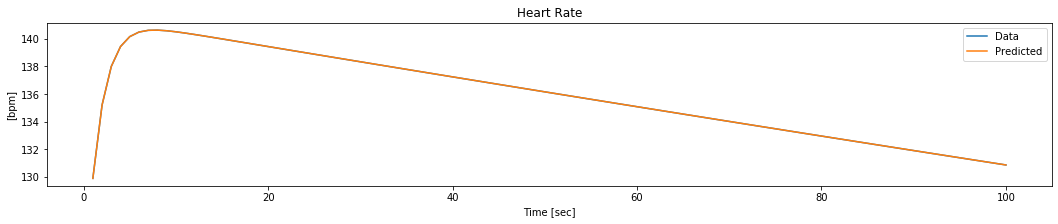

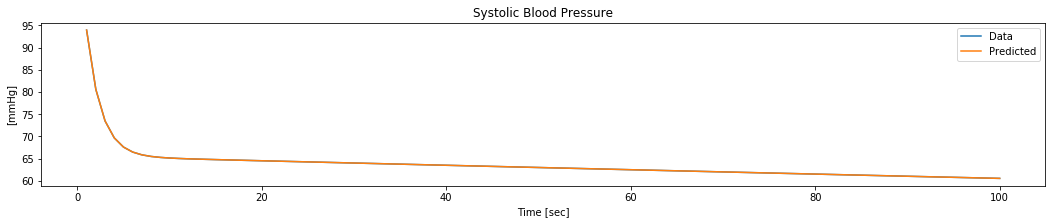

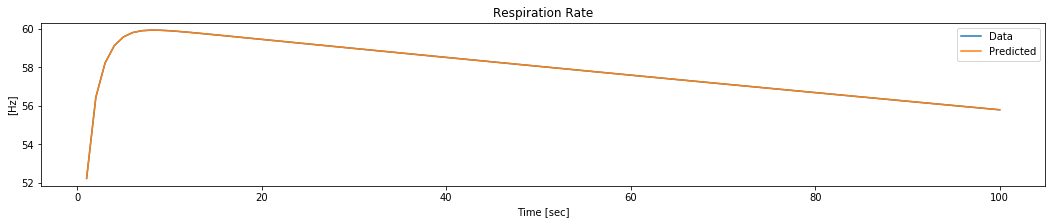

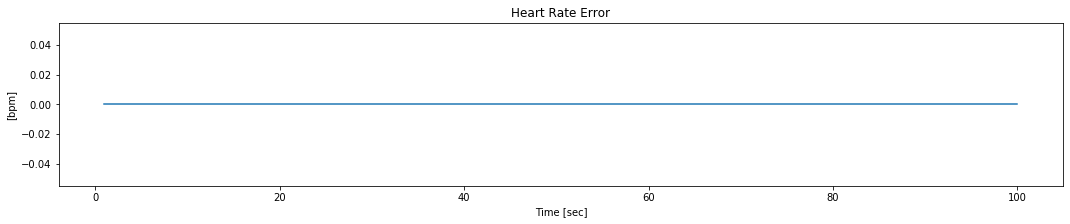

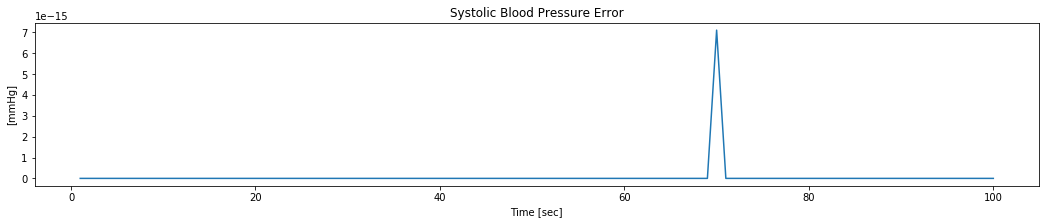

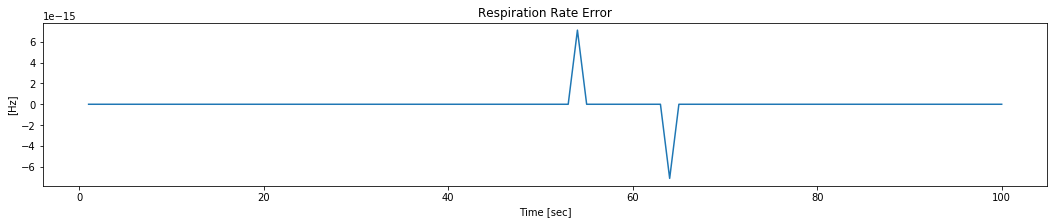

*****************************************************************************************************************


In [6]:
%run configuration.ipynb
%run linear-regression.ipynb

dont_care = 0

train_start = 930 
train_end = 1250
model = find_T(train_start, train_end, 1)

# build the processed data
data = np.array([[120],[120],[30]])
last_coloumn_data = data
for i in range(100):
    last_coloumn_data = np.dot(model.T, last_coloumn_data)
    data = np.hstack((data,last_coloumn_data))

# call test_T & print_prediction_results
prediction = test_T(model, dont_care, dont_care, data)
print_prediction_results(prediction)